In [ ]:
liimport os

os.listdir('./drive/MyDrive/연구실 과제')

['Robust Keypoint Detection Using Higher-Order Scale Space Derivatives Application to Image Retrieval.pdf',
 'Keypoint Detection Using Higher Order Laplacian of Gaussian.pdf',
 'Key.Net_1904.00889.pdf',
 'SuperPoint_1712.07629.pdf',
 'R2D2 Repeatable and Reliable Detector and Descriptor_1906.06195.pdf',
 'D2-Net A Trainable CNN for Joint Detection and Description of Local Features_1905.03561.pdf',
 'house.jpg',
 '연구과제.ipynb']

In [ ]:
!pip uninstall opencv-contrib-python

Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/cv2/config-3.py
    /usr/local/lib/python3.7/dist-packages/cv2/config.py
    /usr/local/lib/python3.7/dist-packages/cv2/cv2.abi3.so
    /usr/local/lib/python3.7/dist-packages/cv2/gapi/__init__.py
    /usr/local/lib/python3.7/dist-packages/cv2/load_config_py2.py
    /usr/local/lib/python3.7/dist-packages/cv2/load_config_py3.py
    /usr/local/lib/python3.7/dist-packages/cv2/mat_wrapper/__init__.py
    /usr/local/lib/python3.7/dist-packages/cv2/misc/__init__.py
    /usr/local/lib/python3.7/dist-packages/cv2/misc/version.py
    /usr/local/lib/python3.7/dist-packages/cv2/utils/__init__.py
    /usr/local/lib/python3.7/dist-packages/cv2/version.py
Procee

In [ ]:
!pip uninstall opencv-contrib-python

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
!pip install opencv-python==3.4.2.17

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.0 MB 1.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install opencv-contrib-python==3.4.2.17

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 30.6 MB 1.3 MB/s 


#### 기존의 해리스 코너 검출 알고리즘은 크기 변화에 민감한 문제를 가지고 있었습니다. 
####SIFT는 이미지 피라미드를 이용해서 크기 변화에 따른 특징점 검출 문제를 해결한 알고리즘입니다. 
####OpenCV에서 제공하는 SIFT 객체 생성자는 다음과 같습니다.

keypoint: 564 descriptor: (564, 128)
[[  3.   3.   0. ...   0.   0.  23.]
 [ 19.   6.   0. ...   0.   0.   1.]
 [ 77. 138.   1. ...   1.   1.   5.]
 ...
 [ 64.   7.   0. ...   0.   0.   0.]
 [ 61.  10.   0. ...   0.   0.   8.]
 [ 53.  23.   3. ...   0.   0.   0.]]


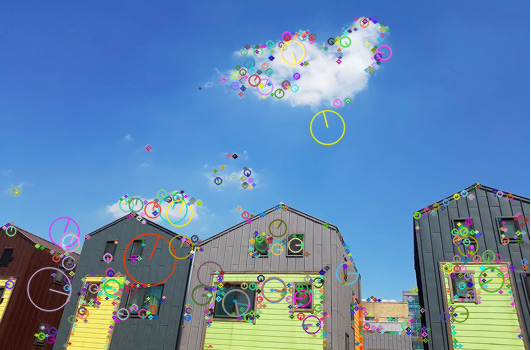

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('./drive/MyDrive/연구실 과제/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 추출기 생성
sift = cv2.xfeatures2d.SIFT_create()
# 키 포인트 검출과 특징 디스크립터 계산
keypoints, descriptor = sift.detectAndCompute(gray, None)
print(f'keypoint: {len(keypoints)} descriptor: {descriptor.shape}')
print(descriptor)

# 키 포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None, \
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 결과 출력
cv2_imshow(img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

#### SIFT는 크기 변화에 따른 특징 검출 문제를 해결하기 위해 이미지 피라미드를 사용하므로 속도가 느리다는 단점이 있습니다.
#### SURF는 이미지 피라미드 대신 필터의 크기를 변화시키는 방식으로 성능을 개선한 알고리즘입니다.

(154, 128) [[ 4.16289689e-03  4.21685958e-03  2.00996757e-03 ...  9.77055053e-04
  -1.14460010e-04  3.61898390e-04]
 [ 7.72498970e-05  1.08146145e-04  2.32563028e-03 ...  8.06422249e-05
  -1.92899432e-04  2.79073045e-03]
 [-2.26428406e-03  4.29155445e-03  6.46703029e-06 ...  2.72297463e-03
  -1.83109206e-03  2.94610416e-03]
 ...
 [ 1.16421776e-04  1.35203023e-04  1.25180057e-03 ...  1.57775928e-03
  -7.37009337e-03  1.19522354e-02]
 [-1.45466276e-03  1.48518337e-03  3.33051779e-03 ...  4.95313725e-04
   1.78551141e-04  3.61462124e-04]
 [-2.47220881e-03  3.61537375e-03  6.79780624e-06 ...  1.66218306e-05
   6.92840113e-05  7.93274958e-05]]


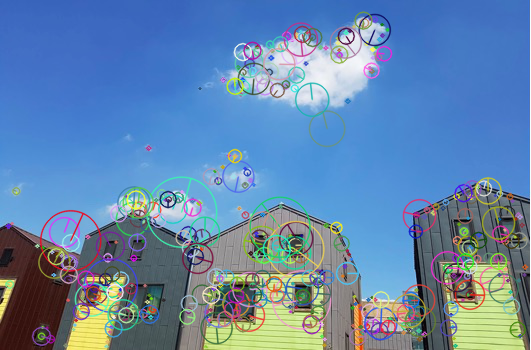

In [ ]:
import cv2
import numpy as np

img = cv2.imread('./drive/MyDrive/연구실 과제/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SURF 추출기 생성 ( 경계:1000, 피라미드:3, 서술자확장:True, 방향적용:True)
surf = cv2.xfeatures2d.SURF_create(1000, 3, True, True)
# 키 포인트 검출 및 서술자 계산
keypoints, desc = surf.detectAndCompute(gray, None)
print(desc.shape, desc)
# 키포인트 이미지에 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

#### 디스크립터 검출기 중 BRIEF(Binary Robust Independent Elementary Features)라는 것이 있습니다. 
#### BRIEF는 특징점 검출은 지원하지 않는 디스크립터 추출기입니다. 
#### 이 BRIEF에 방향과 회전을 고려하도록 개선한 알고리즘이 바로 ORB입니다. 
##### 이 알고리즘은 특징점 검출 알고리즘으로 FAST를 사용하고 회전과 방향을 고려하도록 개선했으며 속도도 빨라 SIFT와 SURF의 좋은 대안으로 사용됩니다.

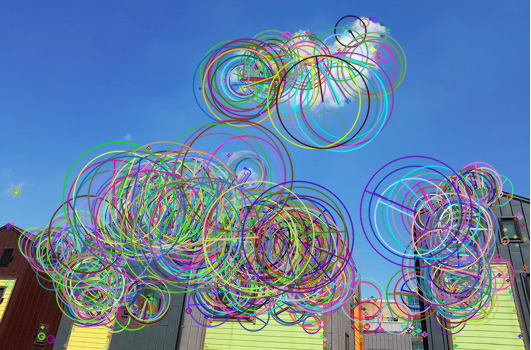

In [ ]:
# ORB로 특징점 및 특징 디스크립터 검출 (desc_orb.py)

import cv2
import numpy as np

img = cv2.imread('./drive/MyDrive/연구실 과제/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ORB 추출기 생성
orb = cv2.ORB_create()
# 키 포인트 검출과 서술자 계산
keypoints, descriptor = orb.detectAndCompute(img, None)
# 키 포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None, \
             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# 결과 출력
cv2_imshow(img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

## BFMatcher와 SIFT로 이미지 매칭 실습

(524, 128)
(759, 128)
<class 'list'>


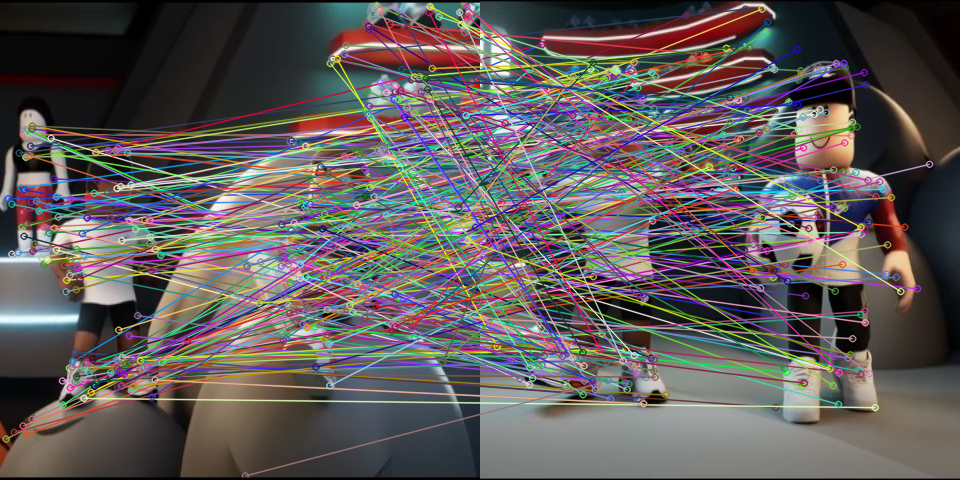

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/drive/MyDrive/연구실 과제/image/roblox2.JPG')
img2 = cv2.imread('/content/drive/MyDrive/연구실 과제/image/roblox3.JPG')
img1 = cv2.resize(img1, (480,480)) # 이미지 동일한 사이즈로 resizing
img2 = cv2.resize(img2, (480,480)) # 이미지 동일한 사이즈로 resizing

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT 객체 생성
detector = cv2.xfeatures2d.SIFT_create()

# 이미지 특징 점 추출, 특징 디스크립터 계산
kp1, desc1 = detector.detectAndCompute(gray1, None)
print(desc1.shape)
kp2, desc2 = detector.detectAndCompute(gray2, None)
print(desc2.shape)

# BFMatcher 생성, L1 거리 측정 기준 사용
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# 두 이미지 특징 디스크립터 매칭
matches = matcher.match(desc1, desc2)
print(type(matches))

# 매칭 된 결과 시각화
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# 결과 출력
cv2_imshow(res)
cv2.waitKey()
cv2.destroyAllWindows()

올바른 매칭점만 골라내는 작업을 수행해야 한다.

In [ ]:
desc1 # kp1을 적절한 숫자로 변환한 특징 디스크립터

array([[  0.,   0.,  48., ...,   0.,   0.,   0.],
       [  0.,   5.,  74., ...,   0.,   0.,   1.],
       [  0.,  19.,  89., ...,   0.,   0.,   1.],
       ...,
       [  1.,  11., 162., ...,   2.,   0.,  21.],
       [  8.,   0.,   0., ...,  29., 112.,  52.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

## 이미지 매칭

### Template Matching 이용


### 매칭에 사용하는 거리 함수

#### 1. CV_TM_SQDIFF
픽셀 값의 제곱 차를 이용하기 때문에 매칭 위치에서 작은 값을 갖음
#### 2. CV_TM_SDQIFF_NORMED
제곱 차 매칭에서 정규화 계수로 나누어준 값으로
이미지 사이에 조명의 차이가 존재하는 경우에 그 영향을 줄여준다.
####3. CV_TM_CCORR
상관관계 방법
템플릿과 입력 이미지의 곱을 제곱하여 모두 더하므로 매칭 위치에서 값이 커진다.
####4. CV_TM_CCORR_NORMED
상관관계 방법을 정규화 계수로 나눈 값
####5. CV_TM_CCOEFF
상관계수 방법으로 템플릿과 입력 이미지 각각의 평균을 고려하여 매칭을 수행
완벽하게 일치: 1
완벽하게 불일치: -1
관련이 없는 경우: 0 값을 반환한다.
연산량이 많은 만큼 정확하다.
####6. CV_TM_CCOEFF_NORMED
상관계수 방법을 정규화 계수로 나눈 것


(257, 223, 3)


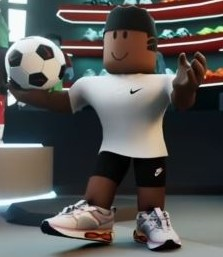

[[ 0.0587798   0.05542934  0.05199942 ... -0.00802407 -0.00885738
  -0.00990841]
 [ 0.06786946  0.0643404   0.06079474 ... -0.00615063 -0.00712526
  -0.00821679]
 [ 0.0790043   0.07563505  0.07219742 ... -0.00377591 -0.00488322
  -0.00596418]
 ...
 [ 0.11045238  0.11424517  0.11810765 ...  0.18645313  0.18996502
   0.19333085]
 [ 0.10279038  0.10643247  0.10991315 ...  0.18484361  0.1884799
   0.19185963]
 [ 0.08763704  0.09099073  0.0940276  ...  0.17457326  0.17828567
   0.18159258]]


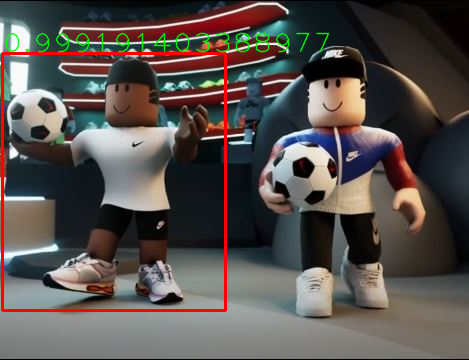

[[0.6322275  0.6303221  0.6283789  ... 0.5705188  0.5698572  0.5690966 ]
 [0.6370143  0.6350553  0.6330829  ... 0.5723507  0.5716266  0.57084584]
 [0.64220124 0.6403212  0.6384081  ... 0.57394516 0.57316554 0.5723896 ]
 ...
 [0.7070553  0.70790666 0.708793   ... 0.7259532  0.7270517  0.7281144 ]
 [0.70509183 0.70588815 0.7066435  ... 0.7259656  0.7271045  0.7281707 ]
 [0.699147   0.6998449  0.70045155 ... 0.72161484 0.7227843  0.7238308 ]]


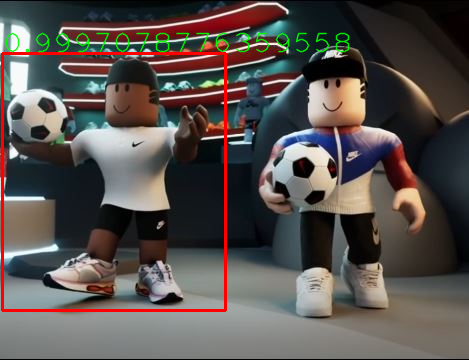

[[0.7383867  0.74254405 0.7467905  ... 0.92091453 0.9231601  0.9255532 ]
 [0.72864246 0.7329007  0.7371997  ... 0.91689754 0.91926616 0.92169815]
 [0.71811724 0.7222106  0.72638464 ... 0.9134553  0.9159333  0.91835374]
 ...
 [0.5874004  0.58558494 0.58370554 ... 0.55115485 0.54908484 0.5470869 ]
 [0.59131056 0.5896059  0.58798903 ... 0.5510884  0.5489368  0.54693115]
 [0.6030694  0.60156476 0.60024816 ... 0.56002825 0.55782044 0.5558592 ]]


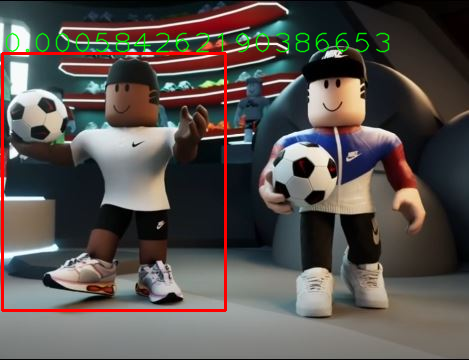

In [ ]:
# 템플릿 매칭으로 객체 위치 검출

import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/연구실 과제/image/roblox3.JPG')
template = cv2.imread('/content/drive/MyDrive/연구실 과제/image/roblox_template.jpg')
#template = cv2.resize(template,(130,130))
print(template.shape)
th,tw = template.shape[:2]
cv2_imshow(template)

# 3가지 매칭 메서드 순회
methods = ['cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF_NORMED']
for i, method_name in enumerate(methods):
  img_draw = img.copy()
  method = eval(method_name)

  # 템플릿 매칭
  res = cv2.matchTemplate(img, template, method)
  print(res)
  # 최소, 최대 및 좌표
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  #print(method_name, min_val, max_val, min_loc, max_loc)

  # TM_SQDIFF의 경우 최솟 값이 좋은 매칭이고 나머지는 반대
  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
    match_val = min_val
  else:
    top_left = max_loc
    match_val = max_val
  bottom_right = (top_left[0] + tw, top_left[1] + th)
  cv2.rectangle(img_draw, top_left, bottom_right, (0,0,255),2)
  # 매칭 포인트 표시
  cv2.putText(img_draw, str(match_val), top_left, \
              cv2.FONT_HERSHEY_PLAIN, 2, (0,255,0), 1, cv2.LINE_AA)
  cv2_imshow(img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows()


(323, 128)
(642, 128)


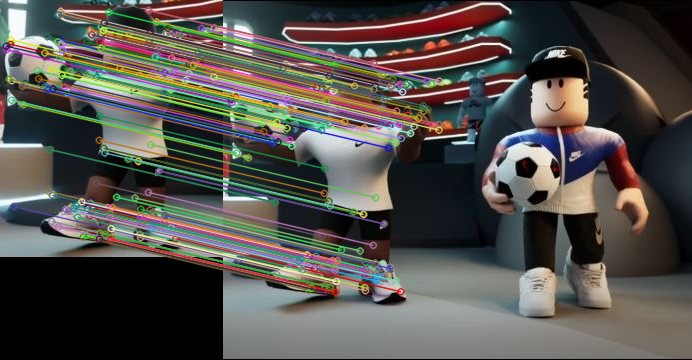

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/drive/MyDrive/연구실 과제/image/roblox_template.jpg')
img2 = cv2.imread('/content/drive/MyDrive/연구실 과제/image/roblox3.JPG')
#img1 = cv2.resize(img1, (480,480)) # 이미지 동일한 사이즈로 resizing
#img2 = cv2.resize(img2, (480,480)) # 이미지 동일한 사이즈로 resizing

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT 객체 생성
detector = cv2.xfeatures2d.SIFT_create()

# 이미지 특징 점 추출, 특징 디스크립터 계산
kp1, desc1 = detector.detectAndCompute(gray1, None)
print(desc1.shape)
kp2, desc2 = detector.detectAndCompute(gray2, None)
print(desc2.shape)

# BFMatcher 생성, L1 거리 측정 기준 사용
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# 두 이미지 특징 디스크립터 매칭
matches = matcher.match(desc1, desc2)
matches = sorted(matches, key = lambda x:x.distance)
max_dist, min_dist = matches[-1].distance, matches[0].distance
# 최소 거리의 10% 지점을 임계점으로 설정
ratio = 0.1 # 실험 값
boundary = (max_dist - min_dist)*ratio + min_dist
correct_matches = [m for m in matches if m.distance<boundary]

# 매칭 된 결과 시각화
res = cv2.drawMatches(img1, kp1, img2, kp2, correct_matches, None, \
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# 결과 출력
cv2_imshow(res)
cv2.waitKey()
cv2.destroyAllWindows()

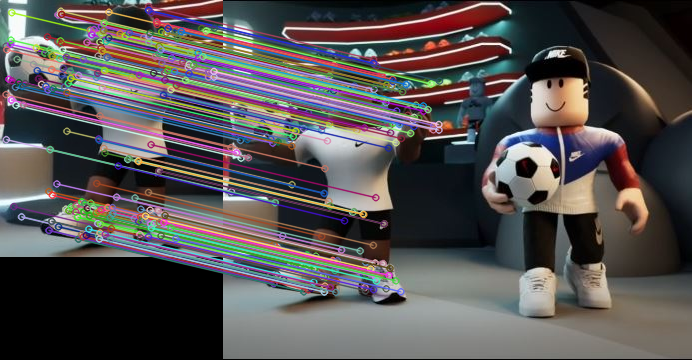

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/drive/MyDrive/연구실 과제/image/roblox_template.jpg')
img2 = cv2.imread('/content/drive/MyDrive/연구실 과제/image/roblox3.JPG')
#img1 = cv2.resize(img1, (480,480)) # 이미지 동일한 사이즈로 resizing
#img2 = cv2.resize(img2, (480,480)) # 이미지 동일한 사이즈로 resizing

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT 객체 생성
detector = cv2.xfeatures2d.SIFT_create()

# 이미지 특징 점 추출, 특징 디스크립터 계산
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# BFMatcher 생성, L1 거리 측정 기준 사용
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)

# 두 이미지 특징 디스크립터 매칭
matches = matcher.knnMatch(desc1, desc2, 2)

# 첫 이웃이 두번째 이웃의 ratio 이내에 위치한 경우만 추출
ratio = 0.50 # 실험 값
correct_matches = [first for first, second in matches if first.distance < second.distance*ratio]

# 매칭 된 결과 시각화
res = cv2.drawMatches(img1, kp1, img2, kp2, correct_matches, None, \
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# 결과 출력
cv2_imshow(res)
cv2.waitKey()
cv2.destroyAllWindows()

keypoint: 323 descriptor: (323, 128)
[[ 2.  8. 12. ...  3.  0.  0.]
 [11.  1.  0. ... 21. 88. 65.]
 [15.  1.  0. ...  0.  0.  0.]
 ...
 [ 1.  2.  0. ... 32. 33. 29.]
 [ 6.  0.  0. ...  0.  0. 20.]
 [24.  0.  0. ...  0.  0.  0.]]


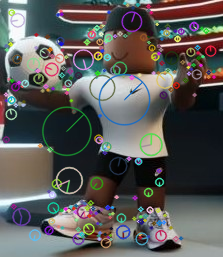

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/연구실 과제/image/roblox_template.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 추출기 생성
sift = cv2.xfeatures2d.SIFT_create()
# 키 포인트 검출과 특징 디스크립터 계산
keypoints, descriptor = sift.detectAndCompute(gray, None)
print(f'keypoint: {len(keypoints)} descriptor: {descriptor.shape}')
print(descriptor)

# 키 포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None, \
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 결과 출력
cv2_imshow(img_draw)
cv2.waitKey()
cv2.destroyAllWindows()